In [44]:
import numpy as np

%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

from scipy import optimize

## Уравнение Пуассона

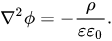

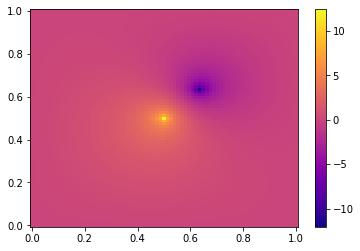

In [52]:
# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 0, 0

charge_density = np.zeros((nx, ny), float)

charge_density[nx//2][ny//2] = 10**5
charge_density[nx//2 + 10][ny//2 + 10] = -10**5

def residual(P):
    d2x = np.zeros_like(P)
    d2y = np.zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

    return d2x + d2y + charge_density

# solve
guess = np.zeros((nx, ny), float)
sol = optimize.root(residual, guess, method='krylov', options={'disp': False})

#sol = root(residual, guess, method='broyden2', options={'disp': True, 'max_rank': 50})
#sol = root(residual, guess, method='anderson', options={'disp': True, 'M': 10})

#print('Residual: %g' % abs(residual(sol.x)).max())

# visualize
%matplotlib inline
x, y = np.mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolormesh(x, y, sol.x, cmap = 'plasma', shading='auto')
plt.colorbar()
plt.show()

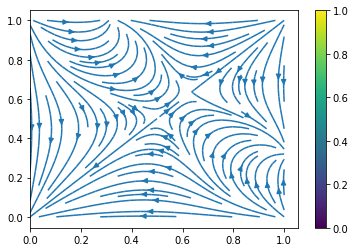

In [57]:
plt.streamplot(np.linspace(0, 1, nx), np.linspace(0, 1, ny),
               -1*np.gradient(sol.x)[0], -1*np.gradient(sol.x)[1], 
               cmap = 'plasma')
plt.colorbar()
plt.show()